In [1]:
import pandas as pd
import category_encoders as ce
from sklearn import preprocessing
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt

df = pd.read_csv('data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
# Задание 8.1 Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.
df['old'] = df['age'].apply(lambda x: 1 if x > 60 else 0)
df['old'].sum()

np.int64(79)

In [3]:
# Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола.
# trestbps — систолическое артериальное давление в состоянии покоя.

def trestpbs_mean(age=0, sex=0):
    '''Определитель среднего систологического давления
    Args:
        age(_int_): _возраст_
        sex(_int_): _пол_
    Return:
        result(_int_): _Нормальное систологическое давления для переданного возраста_
    '''
    if sex==1:
        if age <=20:
            return 123
        elif 21 <= age <= 30:
            return 126
        elif 31 <= age <= 40:
            return 129
        elif 41 <= age <= 50:
            return 135
        elif 51 <= age <= 60:
            return 142
        elif age >= 61:
            return 142
    else:
        if age <=20:
            return 116
        elif 21 <= age <= 30:
            return 120
        elif 31 <= age <= 40:
            return 127
        elif 41 <= age <= 50:
            return 137
        elif 51 <= age <= 60:
            return 144
        elif age >= 61:
            return 159

df['trestbps_mean'] = df.apply(lambda x: trestpbs_mean(x.age, x.sex), axis=1)
df['trestbps_mean'][300]        

np.int64(142)

In [4]:
# Задание 8.5 Закодируйте вышеперечисленные признаки методом OneHotEncoding, удалив исходные признаки.

encoder = ce.OneHotEncoder(cols=['cp'], use_cat_names=True) 
type_bin = encoder.fit_transform(df['cp'])
df = pd.concat([df, type_bin], axis=1)

encoder = ce.OneHotEncoder(cols=['restecg'], use_cat_names=True) 
type_bin = encoder.fit_transform(df['restecg'])
df = pd.concat([df, type_bin], axis=1)

encoder = ce.OneHotEncoder(cols=['slope'], use_cat_names=True) 
type_bin = encoder.fit_transform(df['slope'])
df = pd.concat([df, type_bin], axis=1)

encoder = ce.OneHotEncoder(cols=['ca'], use_cat_names=True) 
type_bin = encoder.fit_transform(df['ca'])
df = pd.concat([df, type_bin], axis=1)

encoder = ce.OneHotEncoder(cols=['thal'], use_cat_names=True) 
type_bin = encoder.fit_transform(df['thal'])
df = pd.concat([df, type_bin], axis=1)

In [5]:
df = df.drop(['cp', 'restecg', 'slope', 'ca', 'thal'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   trestbps       303 non-null    int64  
 3   chol           303 non-null    int64  
 4   fbs            303 non-null    int64  
 5   thalach        303 non-null    int64  
 6   exang          303 non-null    int64  
 7   oldpeak        303 non-null    float64
 8   target         303 non-null    int64  
 9   old            303 non-null    int64  
 10  trestbps_mean  303 non-null    int64  
 11  cp_3.0         303 non-null    int64  
 12  cp_2.0         303 non-null    int64  
 13  cp_1.0         303 non-null    int64  
 14  cp_0.0         303 non-null    int64  
 15  restecg_0.0    303 non-null    int64  
 16  restecg_1.0    303 non-null    int64  
 17  restecg_2.0    303 non-null    int64  
 18  slope_0.0 

<Axes: title={'center': 'Исходные распределения'}, xlabel='age', ylabel='Density'>

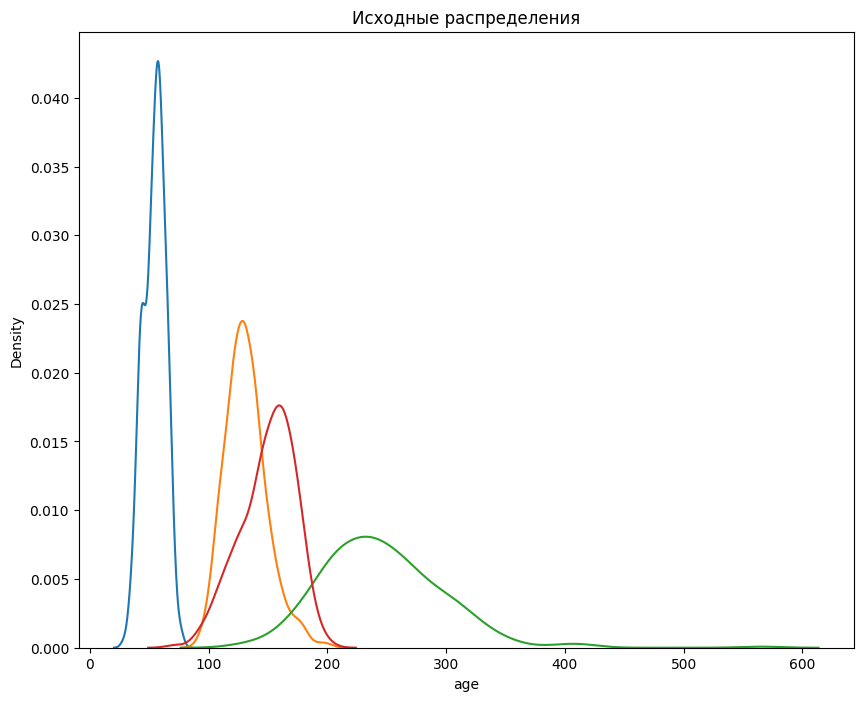

In [6]:
# Задание 8.6 Нормализуйте все числовые признаки подходящим способом.
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['age'], ax=ax1, label ='age')
sns.kdeplot(df['trestbps'], ax=ax1, label ='trestbps')
sns.kdeplot(df['chol'], ax=ax1, label ='chol')
sns.kdeplot(df['thalach'], ax=ax1, label ='thalach')

In [7]:
df.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_1.0,ca_0.0,ca_2.0,ca_1.0,ca_3.0,ca_4.0,thal_1.0,thal_2.0,thal_3.0,thal_0.0
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.623762,246.264026,0.148515,149.646865,0.326733,1.039604,0.544554,0.260726,...,0.462046,0.577558,0.125413,0.214521,0.066007,0.016502,0.059406,0.547855,0.386139,0.006601
std,9.082101,0.466011,17.538143,51.830751,0.356198,22.905161,0.469794,1.161075,0.498835,0.439757,...,0.499382,0.494765,0.331734,0.411169,0.248704,0.127605,0.236774,0.498528,0.487668,0.081110
min,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,274.500000,0.000000,166.000000,1.000000,1.600000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
col_names = list(df.columns)

<Axes: title={'center': 'После распределения'}, xlabel='age', ylabel='Density'>

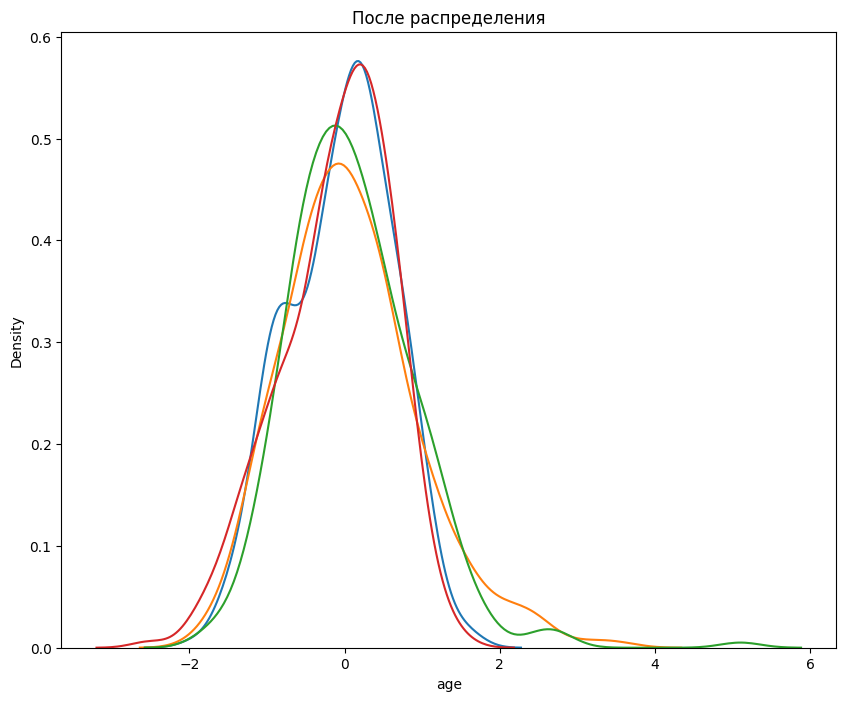

In [9]:
r_scaler  = preprocessing.RobustScaler()

df_r = r_scaler.fit_transform(df)

df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После распределения')

sns.kdeplot(df_r['age'], ax=ax1, label ='age')
sns.kdeplot(df_r['trestbps'], ax=ax1, label ='trestbps')
sns.kdeplot(df_r['chol'], ax=ax1, label ='chol')
sns.kdeplot(df_r['thalach'], ax=ax1, label ='thalach')

In [10]:
df_r.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_1.0,ca_0.0,ca_2.0,ca_1.0,ca_3.0,ca_4.0,thal_1.0,thal_2.0,thal_3.0,thal_0.0
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,-0.046938,-0.316832,0.081188,0.098646,0.148515,-0.103173,0.326733,0.149752,-0.455446,0.260726,...,0.462046,-0.422442,0.125413,0.214521,0.066007,0.016502,0.059406,-0.452145,0.386139,0.006601
std,0.672748,0.466011,0.876907,0.816232,0.356198,0.704774,0.469794,0.725672,0.498835,0.439757,...,0.499382,0.494765,0.331734,0.411169,0.248704,0.127605,0.236774,0.498528,0.487668,0.081110
min,-1.925926,-1.000000,-1.800000,-1.795276,0.000000,-2.523077,0.000000,-0.500000,-1.000000,0.000000,...,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,-0.555556,-1.000000,-0.500000,-0.456693,0.000000,-0.600000,0.000000,-0.500000,-1.000000,0.000000,...,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.444444,0.000000,0.500000,0.543307,0.000000,0.400000,1.000000,0.500000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.629630,0.000000,3.500000,5.102362,1.000000,1.507692,1.000000,3.375000,0.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000


<Axes: >

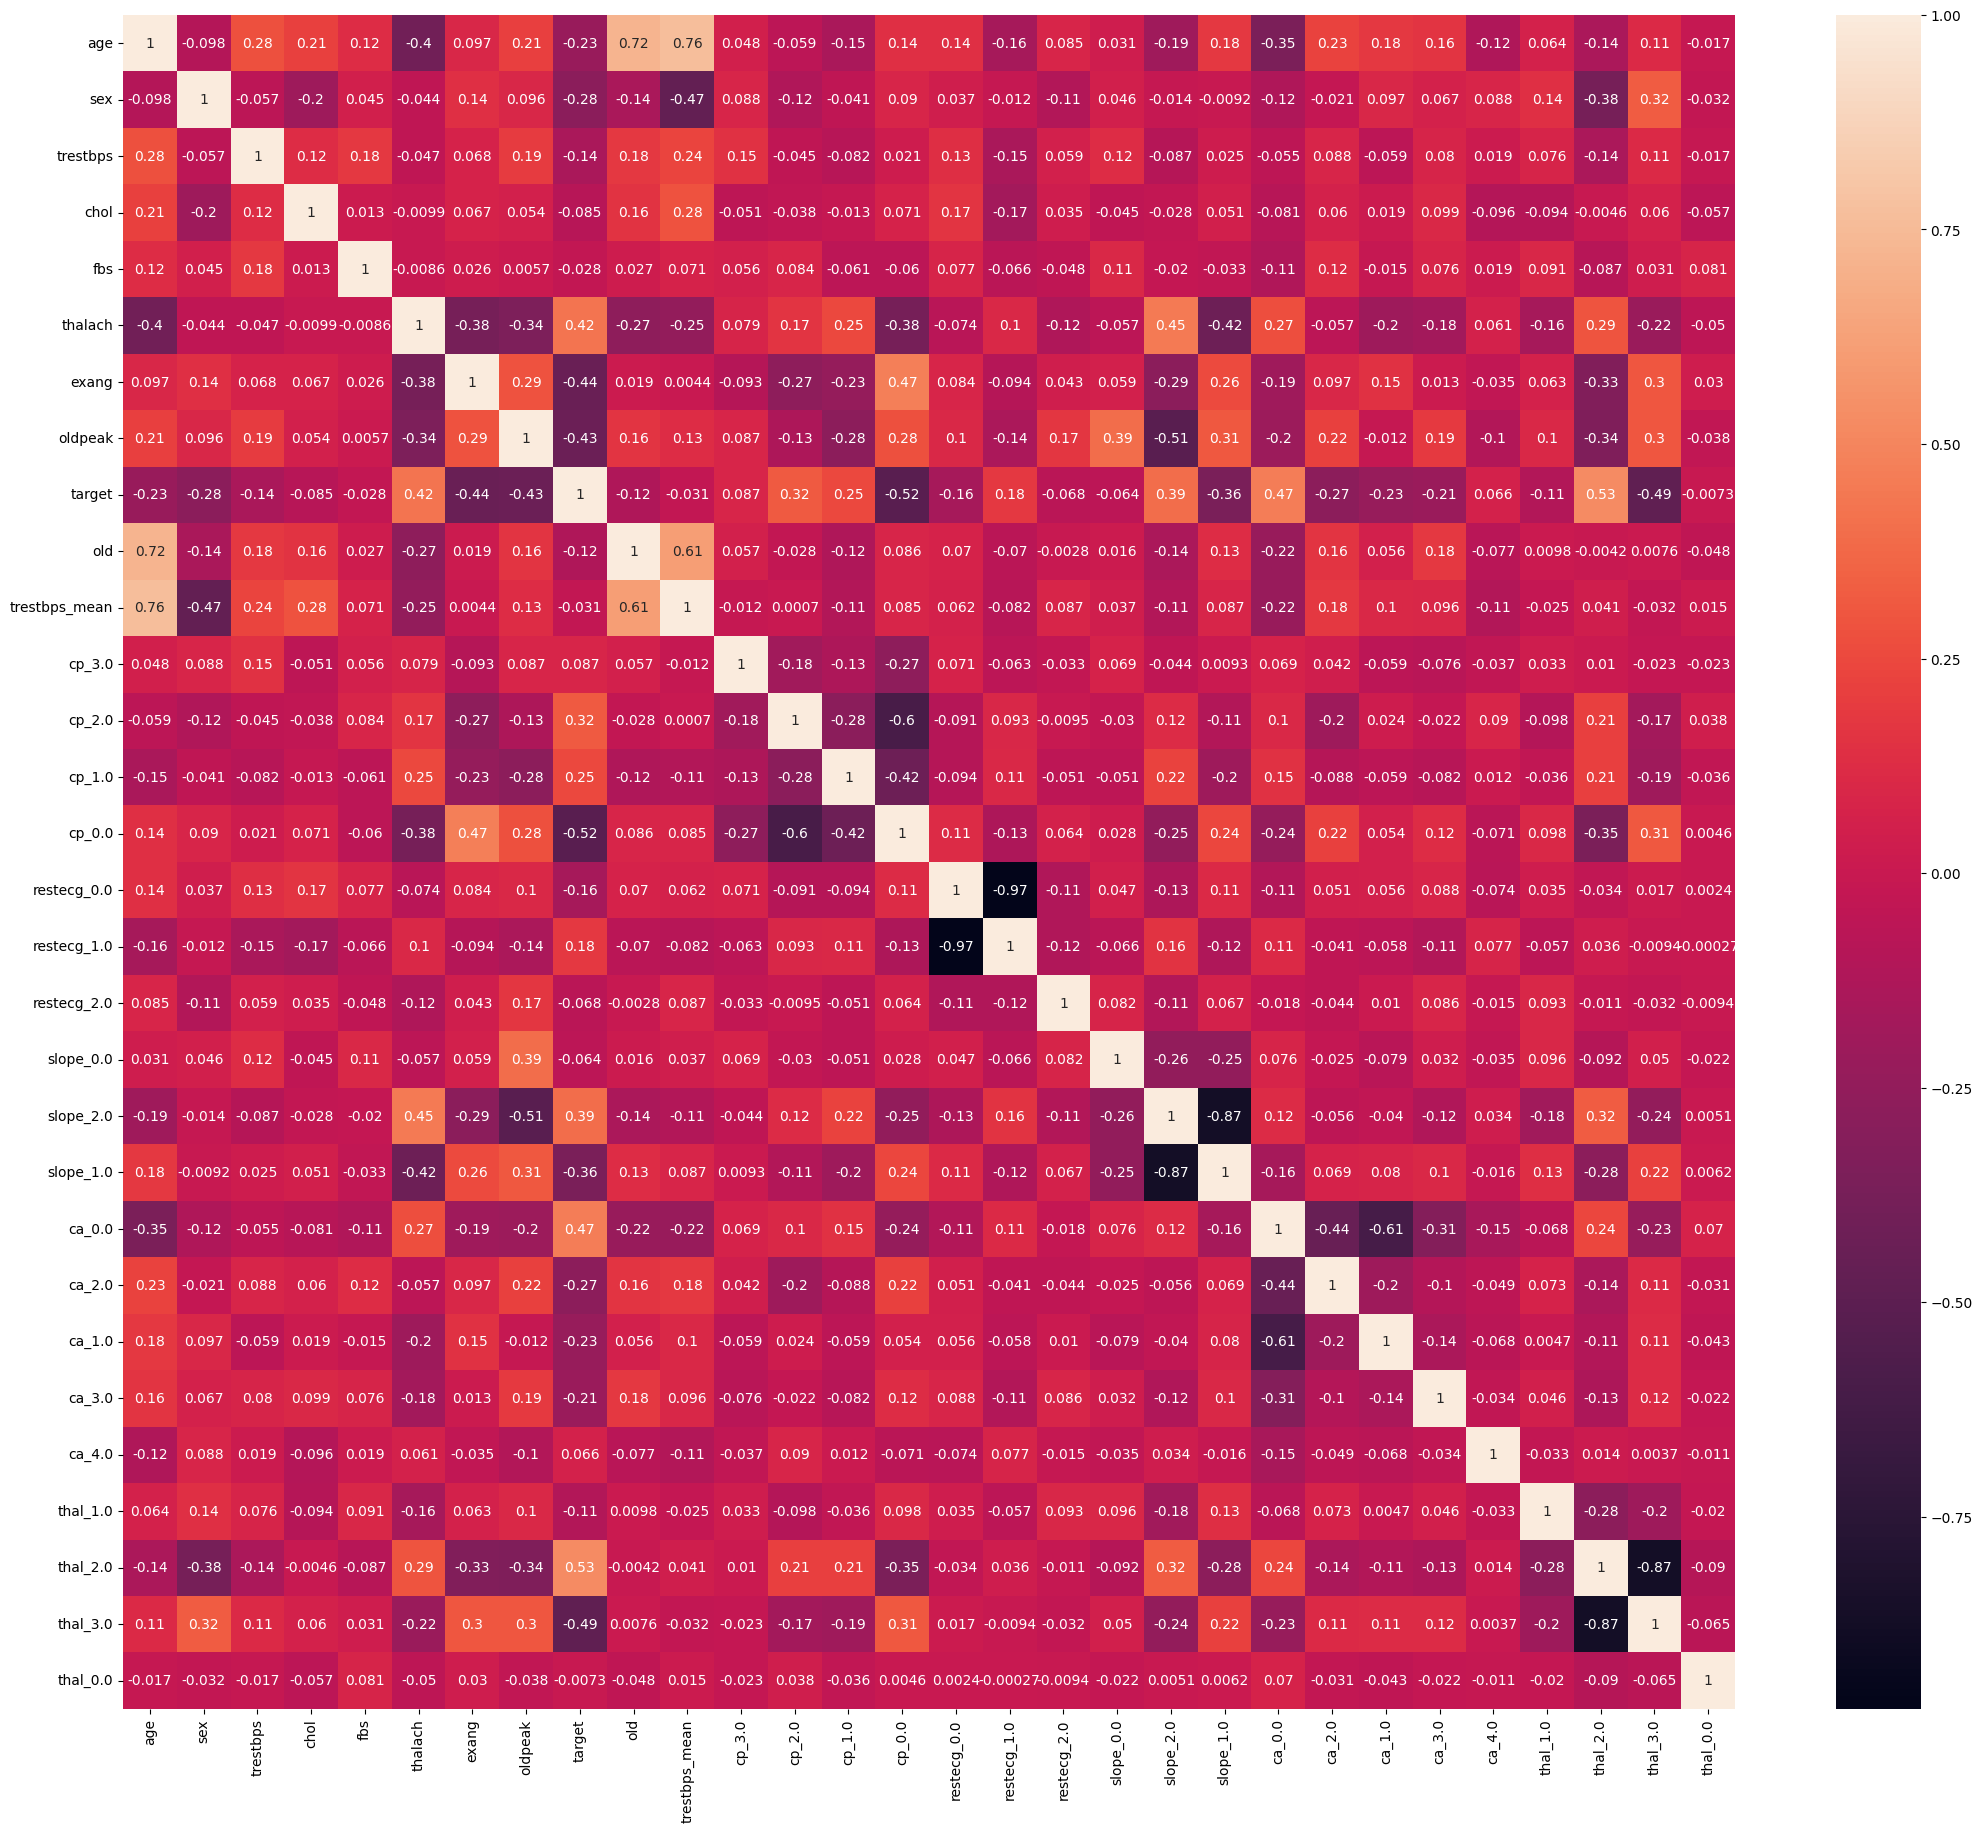

In [11]:
# задание 8.7 Проведите корреляционный анализ и отберите признаки для будущей модели. Выберите пары сильно скоррелированных признаков.
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(26, 22))
sns.heatmap(df.corr(numeric_only=True), annot=True)